In [1]:
# Import dependencies
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Get the data
data = yf.download("NFLX", start='2020-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
# z-score is the number of standard dviations a value is away from the mean

def z_score(dataset):
    return((dataset[-1] - dataset.mean()) / dataset.std())

In [4]:
# Apply z-score function across a rolling set of 30 data points (i.e. "Rolling 7-day average" but instead its "rolling 30-day z-score")
rolled = data['Close'].rolling(window=30).apply(z_score)

<AxesSubplot: xlabel='Date'>

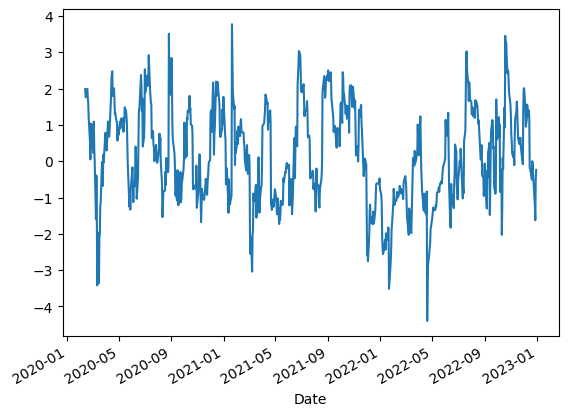

In [7]:
# Plot the data as line chart
rolled.plot()

<AxesSubplot: >

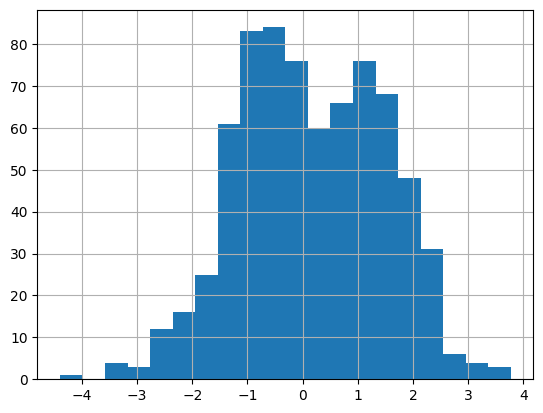

In [8]:
# Plot data in a histogram with 20 bins
rolled.hist(bins=20)

In [13]:
# What is the largest percentage drop over a 30-day rolling period

# Calculate daily percentage change on closing price with '.pct_change()'
# Determine minimum on the 30-day rolling window with '.rolling(window=30).min()'
min_pct_change = data['Close'].pct_change().rolling(window=30).min()

<AxesSubplot: xlabel='Date'>

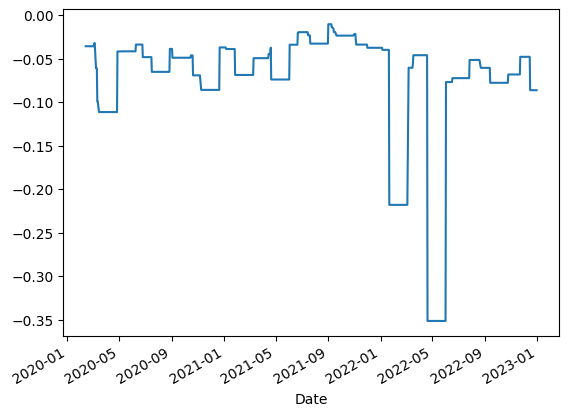

In [14]:
# plot as a line chart
# Very large minimums will dominate the 30-day period and create "steps"
min_pct_change.plot()

<AxesSubplot: >

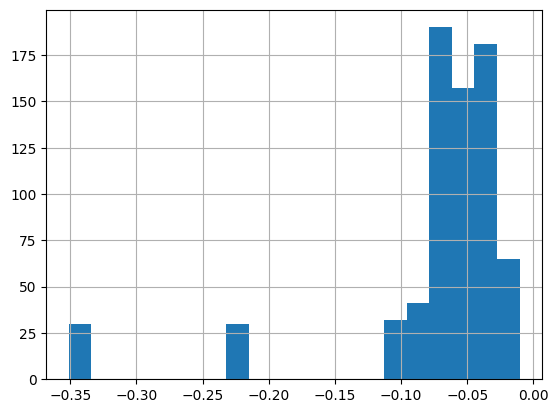

In [15]:
# plot data in a histogram with 20-bins
min_pct_change.hist(bins=20)

In [16]:
# We've graphically shown that Netflix has had a couple very bad days over the course of 3 years